## US worst-case scenarios calculator
**Philip Machanick**\
*17 April 2020*

Explores exponential growth from the known value on 20 M

In [1]:
%%capture
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker

In [3]:
# set up parameters
initialcases = 19383
startdate = datetime.date(2020,3,20)
enddate = datetime.date(2020,4,10)
startcase = 19383
highIncreaseRate = 1.4
lowIncreaseRate = 1.24


In [4]:
dates = np.arange (startdate, enddate, 1)
caseslow = np.arange (1.0, dates.size+1)
caseshigh = np.arange (1.0, dates.size+1)

def expGrowth (start, growth):
    return start * growth;

# uncomment to see data values
# print (expGrowth (1, 1.4))

# print (cases, cases.size, dates.size)
# print (dates)
currentCaseHigh = startcase
currentCaseLow = startcase
for i in range(0,dates.size):
    caseshigh[i] = currentCaseHigh/1000000.0
    currentCaseHigh = expGrowth(currentCaseHigh,highIncreaseRate)
    caseslow[i] = currentCaseLow/1000000.0
    currentCaseLow = expGrowth(currentCaseHigh,lowIncreaseRate)

(array([737505., 737507., 737509., 737511., 737513., 737515., 737516.,
        737518., 737520., 737522., 737524.]),
 <a list of 11 Text major ticklabel objects>)

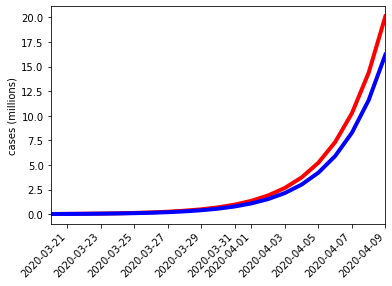

In [5]:
plt.autoscale(enable=True, axis='x', tight=True)
plt.rcParams.update({'font.size': 12})
plt.plot(dates, caseslow, '-', color="red", label='$US worst case$', lw=4)
plt.plot(dates, caseshigh, '-', color="blue", label='$US worst case$', lw=4)

plt.ylabel('cases (millions)')
plt.xticks(rotation=45, ha='right')

# uncomment and correct file path to save the PDF
#plt.savefig("/Users/philip/Desktop/USworstcase.pdf", bbox_inches='tight');